# Lab - Transformada Z

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

Esta atividade explora os conceitos da transformada Z para analizar o comportamento em frequência de sistemas discretos lineares e invariantes ao deslocamento.

In [1]:
from pylab import *
from scipy import signal

1) crie uma função H=respfreq(b,a,N) que retorne H, o vetor complexo que contem a resposta em frequência do sistema para N valores de frequencia entre 0 e $\pi$. 

In [2]:
def respfreq(b,a,N):
    """
    Calcula a resposta em frequencia de um filtro IIR definido pelos coef. b, a 
    para valores de N frequencias digitais entre zero e pi
    retorna o vetor de frequencias w, e o vetor complexo H
    """
    H=empty(N,dtype='complex')
    w=linspace(0,pi,N,endpoint=False)
    z = exp(1j*w) 
    bz = empty(N, dtype='complex')
    az = empty(N, dtype='complex')

    for i in range(N):
        somatorio_bz=zeros(len(bz), dtype='complex') 
        somatorio_az=zeros(len(az), dtype='complex') 
        
        for k in range(len(b)):                   
            somatorio_bz[k] += b[k]*z[i]**-k
                                                                                              
        for k in range(len(a)):                
            somatorio_az[k] += a[k]*z[i]**-k          
        bz[i] = sum(somatorio_bz)
        az[i] = sum(somatorio_az)
        H[i] = bz[i]/az[i]
    
   
    return w,H

2) Considere o sistema $y[n]=T\{x[n]\}$, linear,invariante ao deslocamento, determinado pela EDCC:
$ y[n]= 1,5y[n-1]-0,7y[n-2]+0.3x[n]+0.2x[n-1]+0.1x[n-2]$

Plote no mesmo eixo a resposta em frequencia deste sistema usando respfreq() com 100 valores (linha) e freqz() com 40 valores (simbolo 'o').


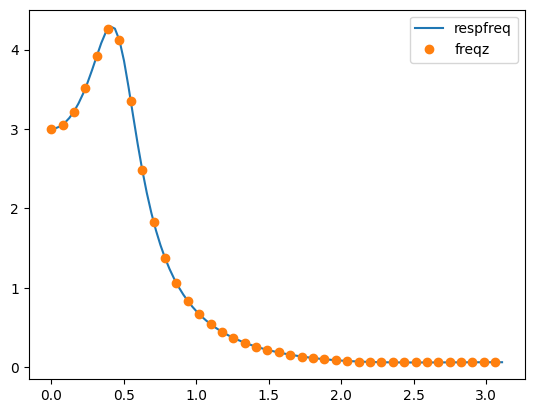

In [3]:
a=array([-1,1.5, -0.7])
b=array([ 0.3 , 0.2,  0.1])

w, H = respfreq(b,a,100)
plot(w, abs(H), label='respfreq')

wfreqz, Hfreqz = signal.freqz(b,a,40)
plot(wfreqz, abs(Hfreqz), 'C1o', label='freqz')
legend()
plt.show()

3) Informe os pólos e zeros deste sistema

In [4]:
zeros = roots(b)
polos = roots(a)
print('zeros:', zeros)
print('polos:', polos)

zeros: [-0.33333333+0.47140452j -0.33333333-0.47140452j]
polos: [0.75+0.37080992j 0.75-0.37080992j]


4) plote o diagrama de pólos e zeros

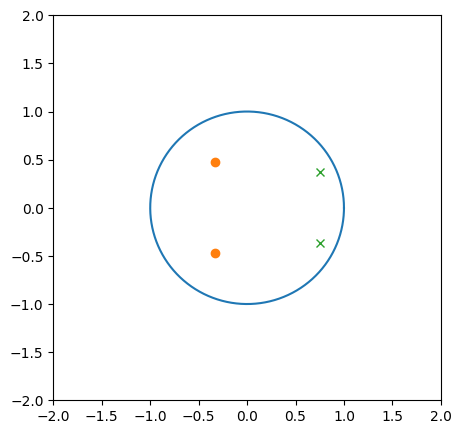

In [5]:
theta = arange(0, 2*pi, 0.01)

r = 1
x = r*cos(theta) 
y = r*sin(theta)

figure(figsize=(5,5))
plot(x,y)
plot(real(zeros),imag(zeros), 'C1o') 
plot(real(polos),imag(polos), 'C2x') 
xlim(-2,2)
ylim(-2,2)
plt.show()